In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=0b32f7bb8c677227555c68798abdf8afba8b4f8bf98ef9c7345eff645e98676f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
!pip install gdown

In [ ]:
# Importing important libraries
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error, r2_score,mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [ ]:
# Fetching data from gogle drive
file_url_y = 'https://drive.google.com/uc?id=12-AgU5lqWaCcaD-3LwJyqwcadEViTnZM'
file_url_x = 'https://drive.google.com/uc?id=1TbXuEpvlslPBWWrC0wnVoEncpnE1sB8E'
file_name_y = 'data_Y.csv'
file_name_x = 'data_X.csv'

gdown.download(file_url_x, file_name_x, quiet=False)
gdown.download(file_url_y, file_name_y, quiet=False)

try:
    df_x = pd.read_csv(file_name_x)
    df_y = pd.read_csv(file_name_y)
except pd.errors.ParserError as e:
    print("Error parsing CSV file:", e)

Downloading...
From (original): https://drive.google.com/uc?id=1TbXuEpvlslPBWWrC0wnVoEncpnE1sB8E
From (redirected): https://drive.google.com/uc?id=1TbXuEpvlslPBWWrC0wnVoEncpnE1sB8E&confirm=t&uuid=6b12b78f-457c-43de-97ff-696d5bed9054
To: /content/data_X.csv
100%|██████████| 196M/196M [00:03<00:00, 64.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12-AgU5lqWaCcaD-3LwJyqwcadEViTnZM
To: /content/data_Y.csv
100%|██████████| 730k/730k [00:00<00:00, 9.20MB/s]


In [ ]:
df_x.head()

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


In [ ]:
df_y.head()

,date_time,quality
0,2015-01-04 00:05:00,392
1,2015-01-04 01:05:00,384
2,2015-01-04 02:05:00,393
3,2015-01-04 03:05:00,399
4,2015-01-04 04:05:00,400


In [ ]:
df_y.shape

(29184, 2)

In [ ]:
df_x.shape

(2103841, 18)

In [ ]:
train_df = df_x.merge(df_y, left_on='date_time', right_on='date_time')

In [ ]:
train_df.head()

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,2015-01-04 00:05:00,277,326,273,322,335,352,505,501,670,326,379,337,231,236,242,153.77,7.90,392
1,2015-01-04 01:05:00,277,253,272,320,333,355,500,501,687,337,396,335,234,242,230,158.27,6.96,384
2,2015-01-04 02:05:00,262,218,260,326,336,330,505,499,443,347,399,332,243,251,240,153.36,7.29,393
3,2015-01-04 03:05:00,243,238,252,327,329,308,520,498,540,342,387,334,257,258,246,153.21,7.11,399
4,2015-01-04 04:05:00,236,238,245,323,320,318,522,501,524,343,371,344,264,263,265,195.71,7.97,400


In [ ]:
train_df.shape

(29184, 19)

In [ ]:
new_train_df=train_df.drop('date_time',axis=1)

In [ ]:
new_train_df.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,277,326,273,322,335,352,505,501,670,326,379,337,231,236,242,153.77,7.90,392
1,277,253,272,320,333,355,500,501,687,337,396,335,234,242,230,158.27,6.96,384
2,262,218,260,326,336,330,505,499,443,347,399,332,243,251,240,153.36,7.29,393
3,243,238,252,327,329,308,520,498,540,342,387,334,257,258,246,153.21,7.11,399
4,236,238,245,323,320,318,522,501,524,343,371,344,264,263,265,195.71,7.97,400


In [ ]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29184 entries, 0 to 29183
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29184 non-null  int64  
 1   T_data_1_2  29184 non-null  int64  
 2   T_data_1_3  29184 non-null  int64  
 3   T_data_2_1  29184 non-null  int64  
 4   T_data_2_2  29184 non-null  int64  
 5   T_data_2_3  29184 non-null  int64  
 6   T_data_3_1  29184 non-null  int64  
 7   T_data_3_2  29184 non-null  int64  
 8   T_data_3_3  29184 non-null  int64  
 9   T_data_4_1  29184 non-null  int64  
 10  T_data_4_2  29184 non-null  int64  
 11  T_data_4_3  29184 non-null  int64  
 12  T_data_5_1  29184 non-null  int64  
 13  T_data_5_2  29184 non-null  int64  
 14  T_data_5_3  29184 non-null  int64  
 15  H_data      29184 non-null  float64
 16  AH_data     29184 non-null  float64
 17  quality     29184 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


In [ ]:
new_train_df.isnull().sum()

T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
quality       0
dtype: int64

In [ ]:
new_train_df.describe()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
count,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.00000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000
mean,250.034265,249.814179,250.152584,349.803008,349.717893,349.951377,501.162932,500.918037,501.318291,348.956689,348.952063,349.67352,249.800644,249.671635,249.848890,174.750047,7.500597,402.800747
std,32.350350,30.453885,30.635287,43.752481,41.414882,38.016812,62.418309,64.634889,61.482540,38.755415,40.172444,39.73318,30.780582,30.545967,30.630141,14.403922,1.146831,46.273228
min,-193.000000,-120.000000,-96.000000,-703.000000,-914.000000,-186.000000,-591.000000,-759.000000,-441.000000,-441.000000,-446.000000,-594.00000,-82.000000,-106.000000,-128.000000,145.000000,3.120000,221.000000
25%,228.000000,228.000000,229.000000,328.000000,328.000000,328.000000,464.000000,463.000000,464.000000,327.000000,327.000000,327.00000,229.000000,229.000000,228.000000,162.460000,6.730000,372.000000
50%,250.000000,250.000000,250.000000,350.000000,350.000000,350.000000,502.000000,502.000000,502.000000,349.000000,349.000000,350.00000,250.000000,250.000000,250.000000,174.400000,7.510000,408.000000
75%,272.000000,271.000000,272.000000,372.000000,372.000000,372.000000,538.000000,537.000000,539.000000,371.000000,371.000000,371.00000,271.000000,271.000000,271.000000,186.980000,8.280000,439.000000
max,722.000000,564.000000,643.000000,1299.000000,1178.000000,886.000000,1491.000000,2492.000000,1294.000000,1136.000000,1204.000000,944.00000,879.000000,737.000000,619.000000,206.680000,11.620000,505.000000


**Correlation Matrix**

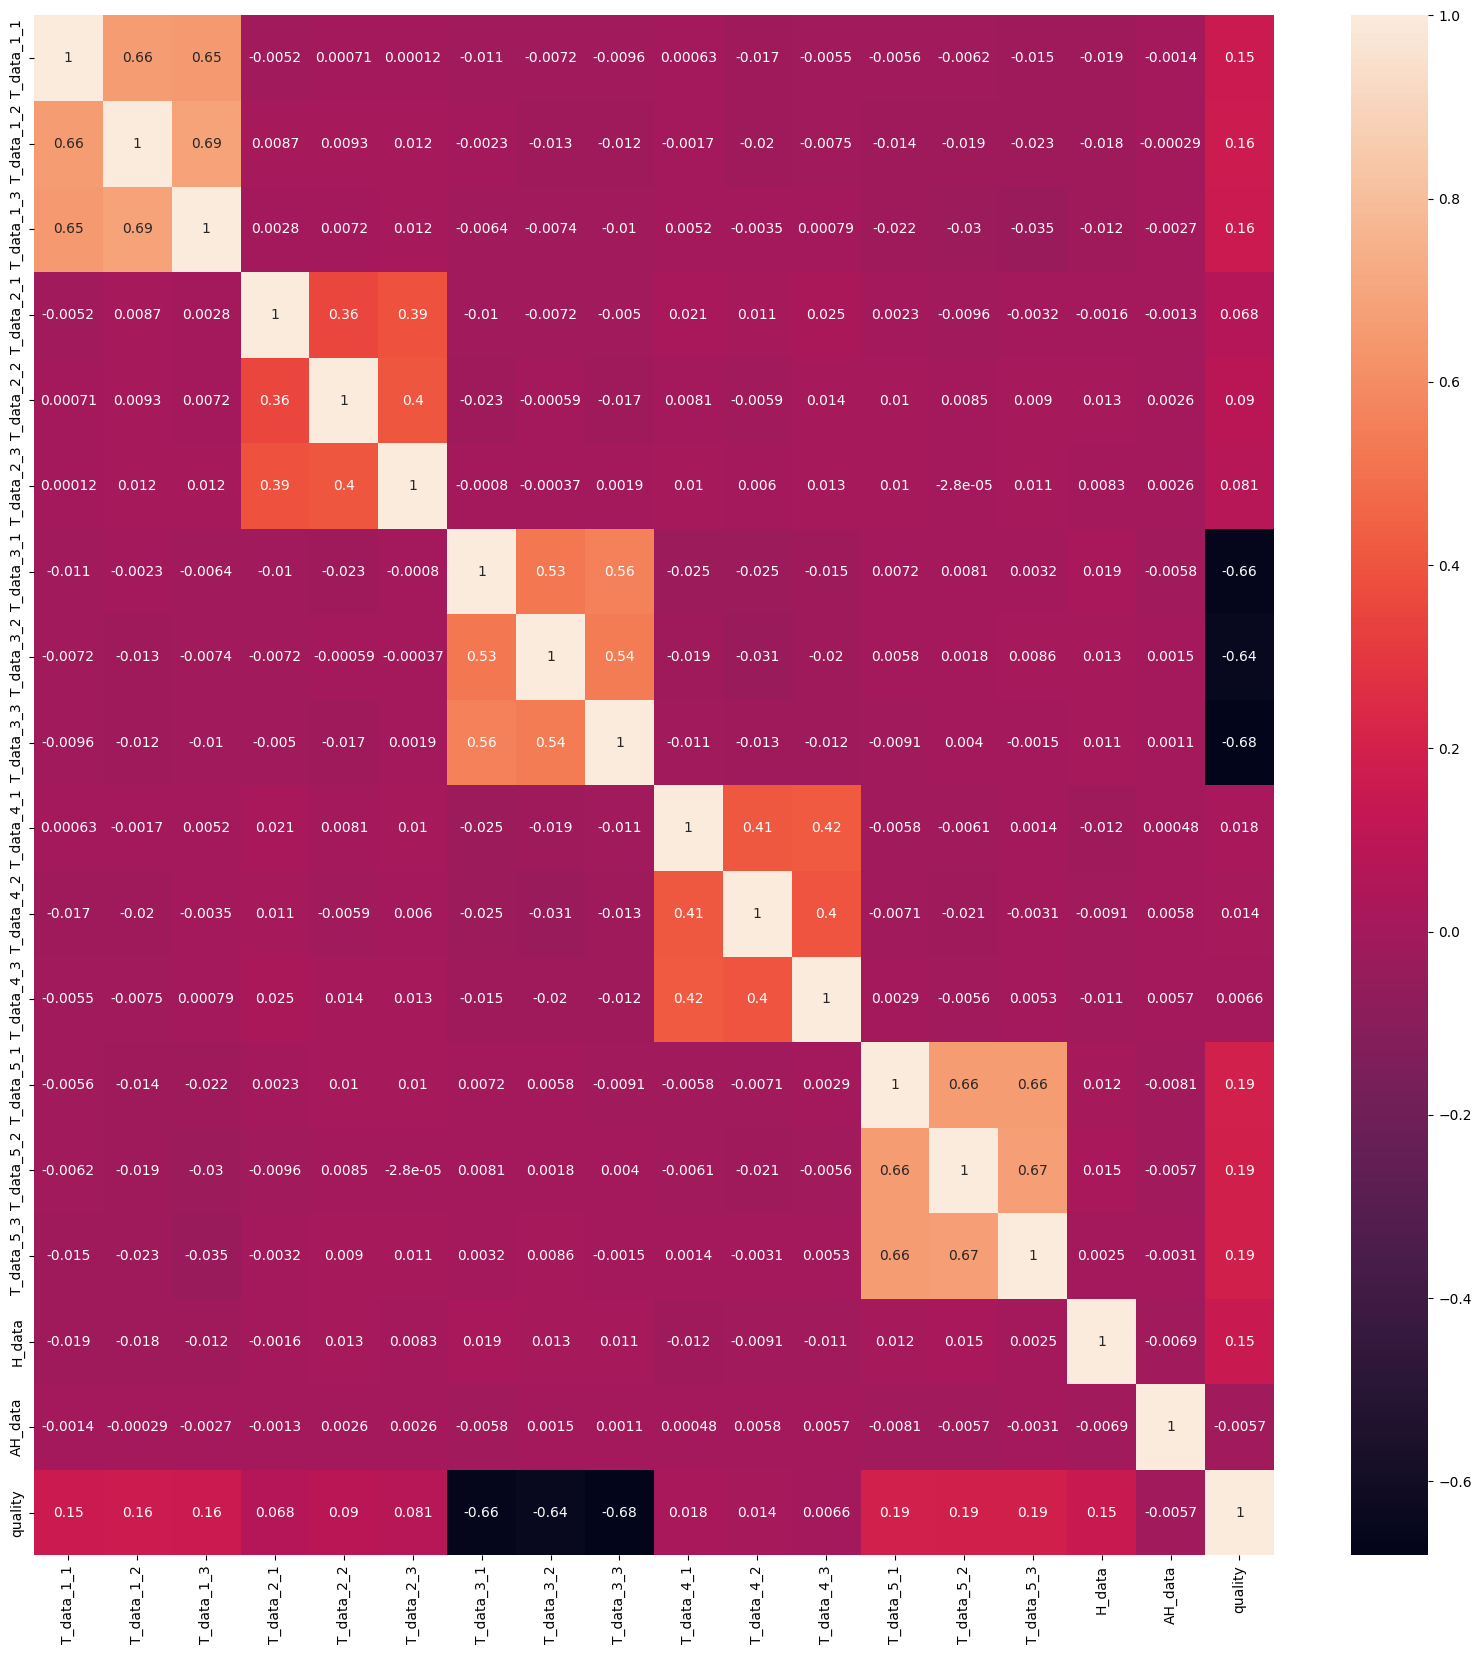

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(new_train_df.corr(),annot=True)
plt.show()

**Histograms**

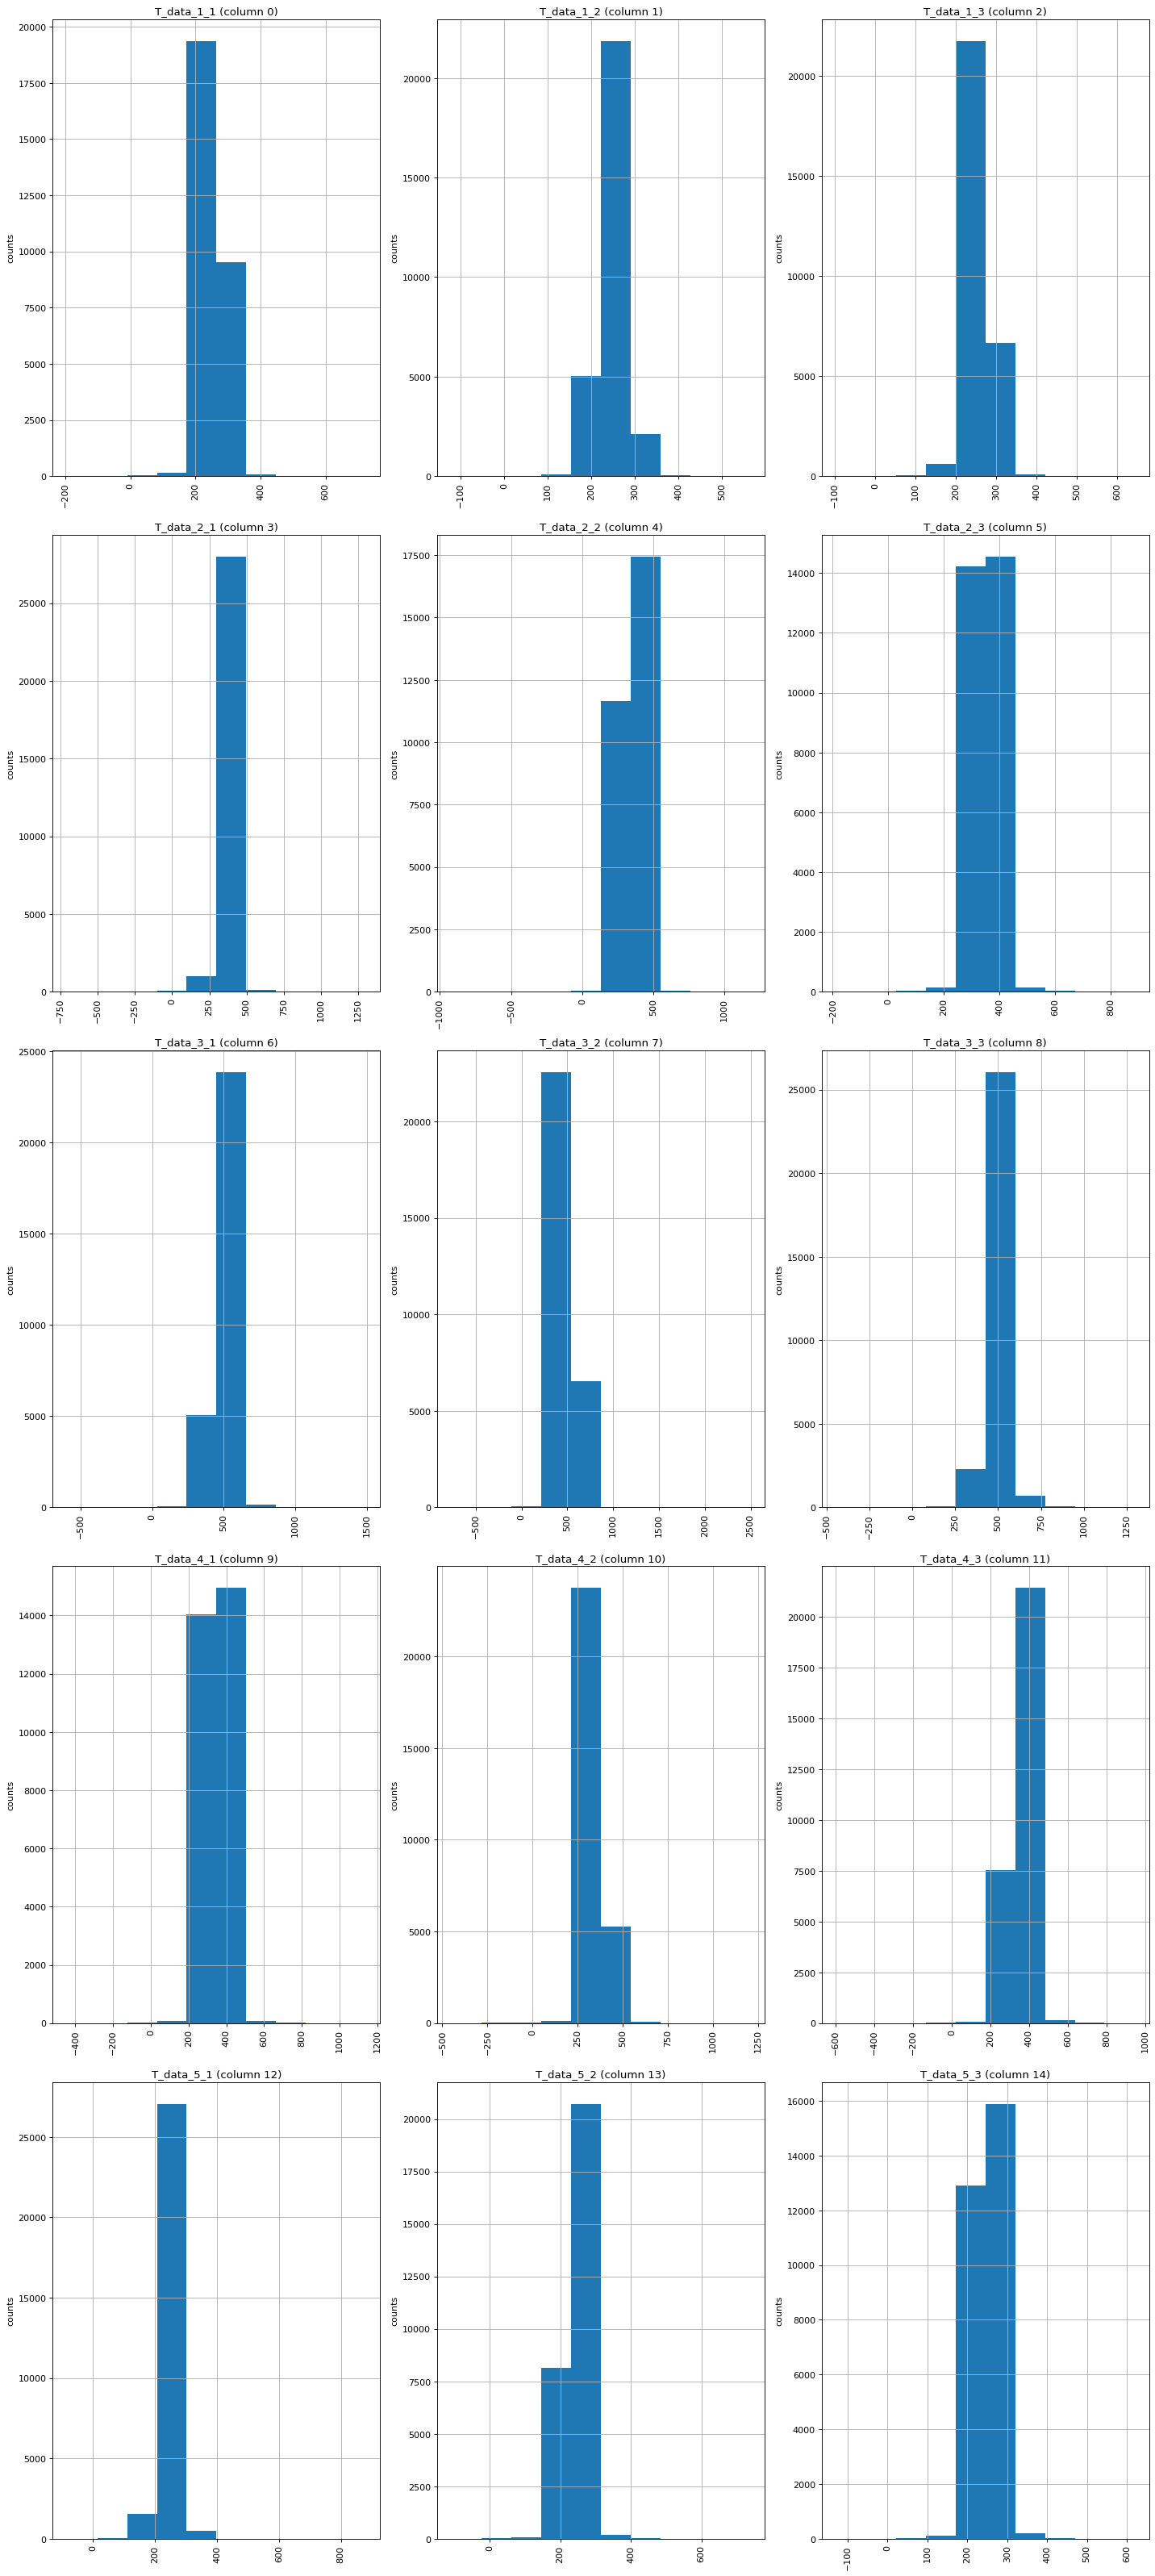

In [ ]:
nRow, nCol = new_train_df.shape
columnNames = list(new_train_df)
nGraphRow = (nCol + 2) / 3
plt.figure(num = None, figsize = (6 * 3, 8 * 5), dpi = 80, facecolor = 'w', edgecolor = 'k')
for i in range(min(nCol, 15)):
    plt.subplot(5, 3, i + 1)
    columnDf = new_train_df.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation = 90)
    plt.title(f'{columnNames[i]} (column {i})')
plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.show()

**Scatter Plot**

In [ ]:
df=new_train_df.copy()

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

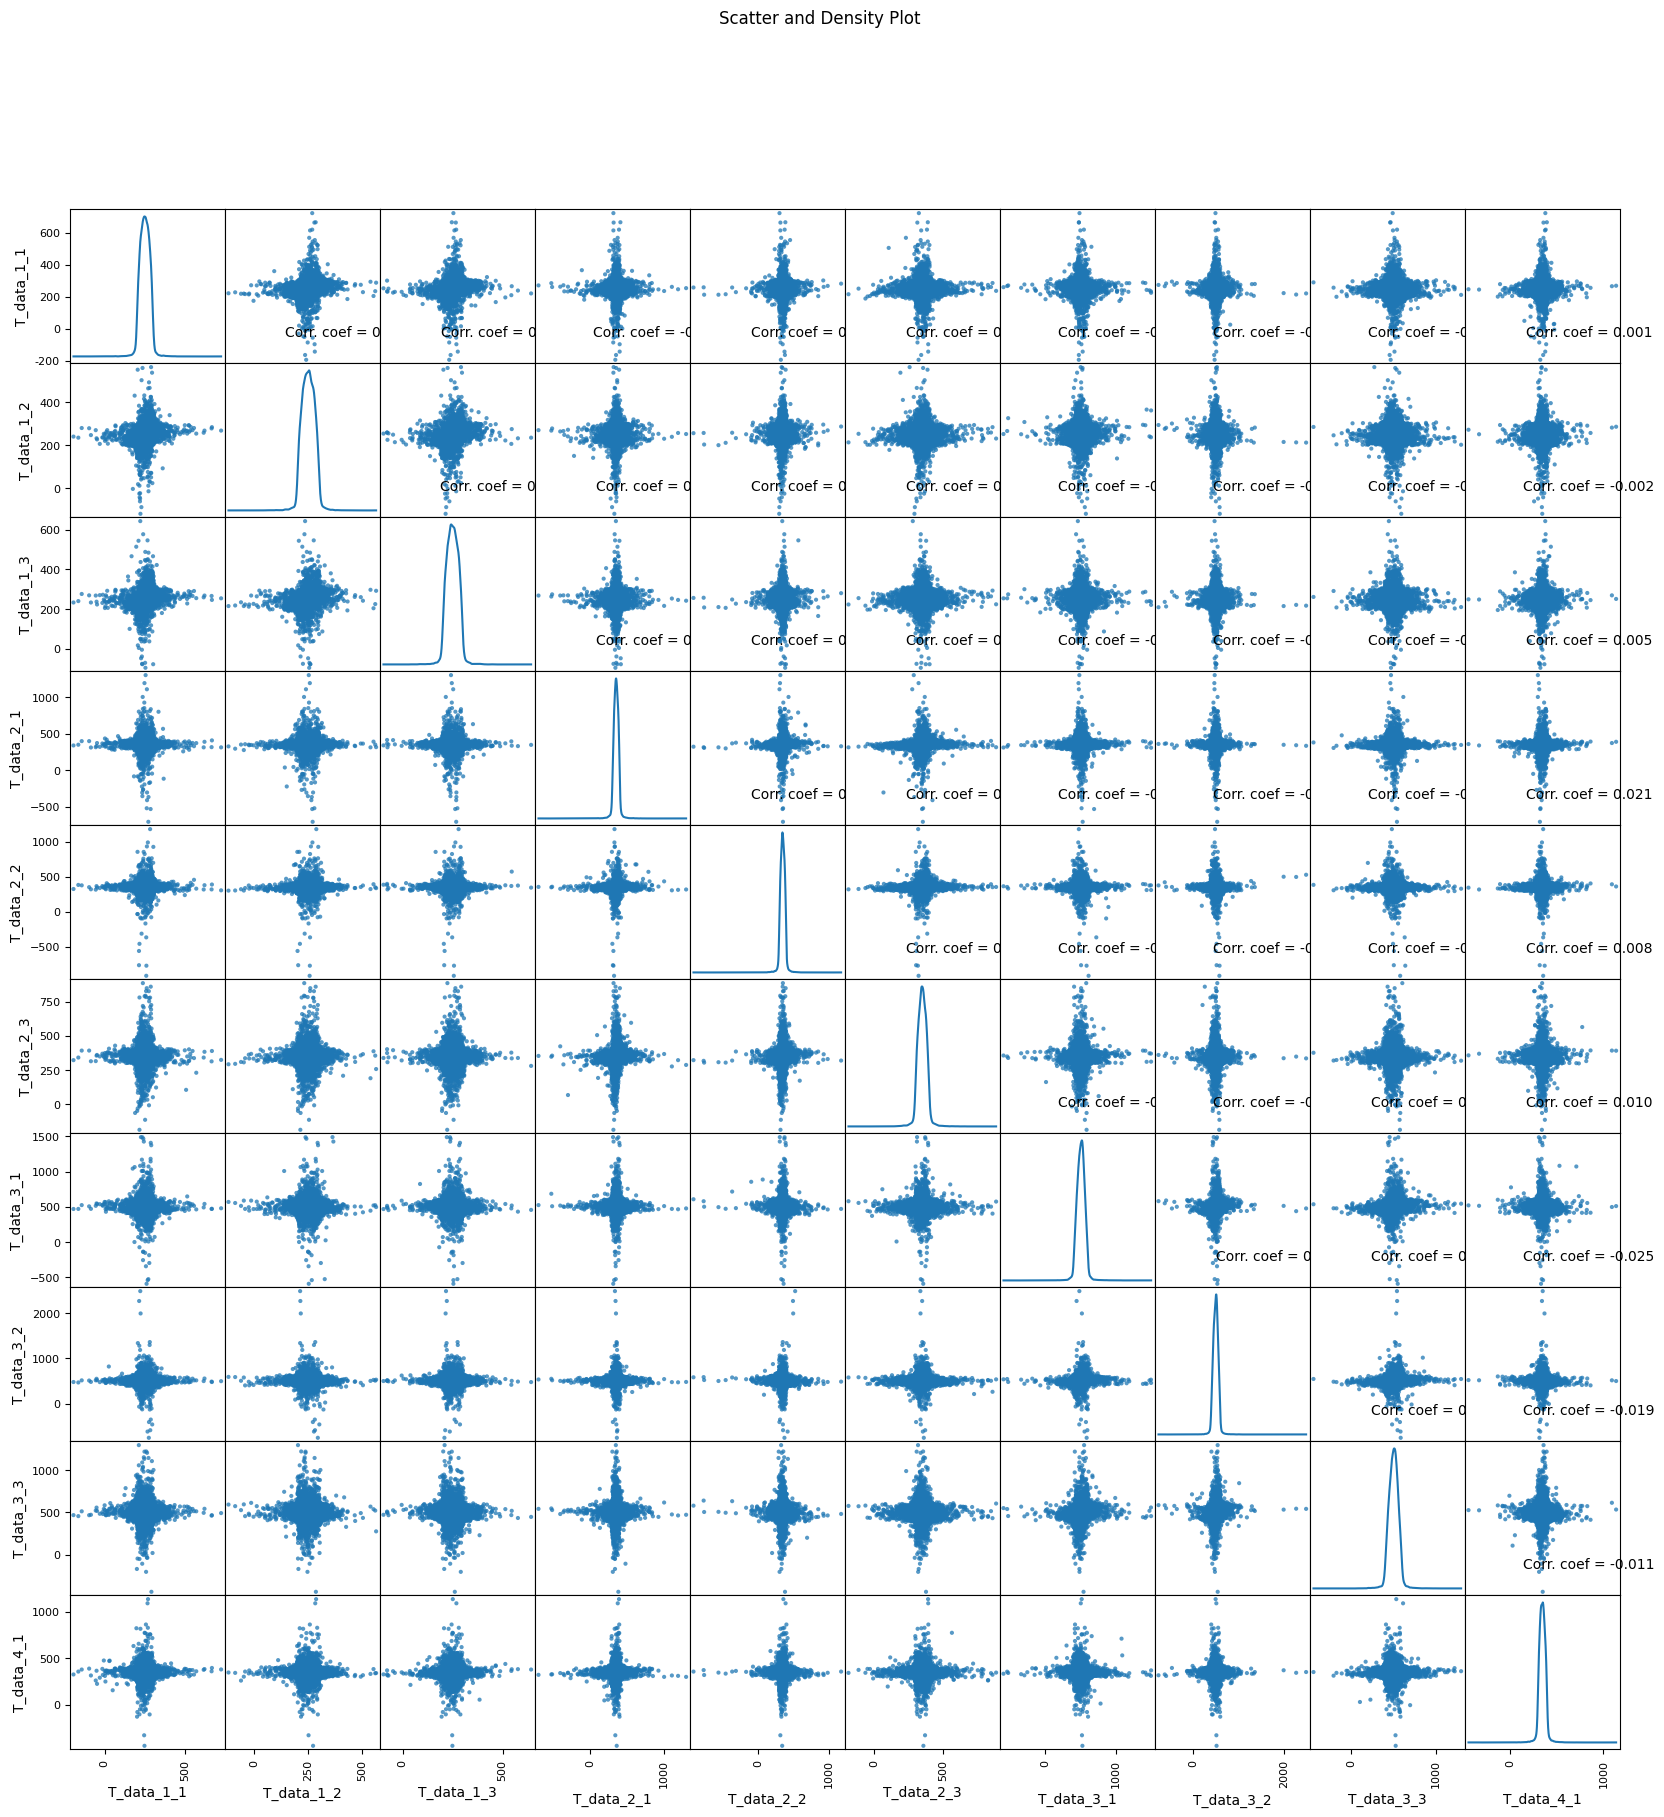

In [ ]:
plotScatterMatrix(df,20,10)

**HistPlot**

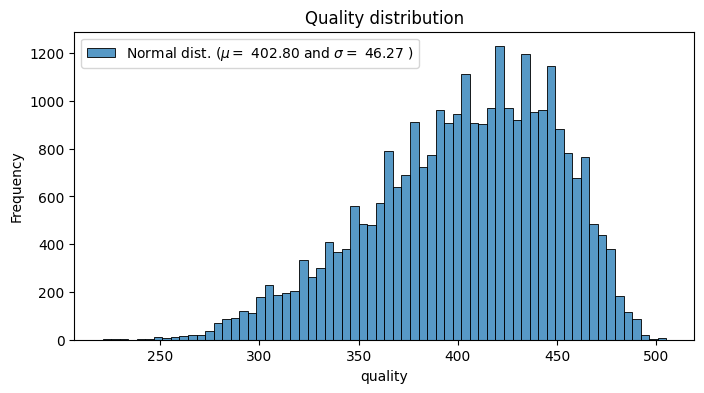

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(new_train_df['quality'] );
(mu, sigma) = norm.fit(train_df['quality'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Quality distribution');

**Training**

In [ ]:
new_train_df.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,277,326,273,322,335,352,505,501,670,326,379,337,231,236,242,153.77,7.90,392
1,277,253,272,320,333,355,500,501,687,337,396,335,234,242,230,158.27,6.96,384
2,262,218,260,326,336,330,505,499,443,347,399,332,243,251,240,153.36,7.29,393
3,243,238,252,327,329,308,520,498,540,342,387,334,257,258,246,153.21,7.11,399
4,236,238,245,323,320,318,522,501,524,343,371,344,264,263,265,195.71,7.97,400


In [ ]:
# we will traitest split on the new_train_df and will validate using new_test_df

In [ ]:
x=new_train_df.drop('quality',axis=1)
y=new_train_df['quality']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=71)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
train_df.head()

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,2015-01-04 00:05:00,277,326,273,322,335,352,505,501,670,326,379,337,231,236,242,153.77,7.90,392
1,2015-01-04 01:05:00,277,253,272,320,333,355,500,501,687,337,396,335,234,242,230,158.27,6.96,384
2,2015-01-04 02:05:00,262,218,260,326,336,330,505,499,443,347,399,332,243,251,240,153.36,7.29,393
3,2015-01-04 03:05:00,243,238,252,327,329,308,520,498,540,342,387,334,257,258,246,153.21,7.11,399
4,2015-01-04 04:05:00,236,238,245,323,320,318,522,501,524,343,371,344,264,263,265,195.71,7.97,400


Linear Regression

In [ ]:
linear_model=LinearRegression()

In [ ]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear_model.score(X_test,y_test)

0.7673792243854771

In [ ]:
y_pred_linear = linear_model.predict(X_test)

In [ ]:
#y_test_true=y_test.to_numpy()

In [ ]:
MAE_linear = mean_absolute_error(y_test, y_pred_linear)
r2_score_lim_0 = r2_score(y_test, y_pred_linear)
MSE_linear=mean_squared_error(y_test,y_pred_linear)
print('MAE - Linear Regression = ', MAE_linear)
print('MSE - Linear Regression = ', MSE_linear)


MAE - Linear Regression =  15.254885438587754
MSE - Linear Regression =  497.9540837784317


In [ ]:
def show_scatter(y_p, y_true, nested_pred=False):
    if nested_pred:
        y_p = y_p.transpose()[0].transpose()
    plt.scatter(y_p, y_true, color='b', alpha=0.25)
    min_val = np.concatenate((y_p, np.array(y_true))).min()
    max_val = np.concatenate((y_p, np.array(y_true))).max()
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color = 'r')
    plt.xlim(min_val,max_val)
    plt.ylim(min_val,max_val)
    plt.title('Scatter Plot')
    plt.xlabel('Predicted Quality')
    plt.ylabel('Actual Quality')

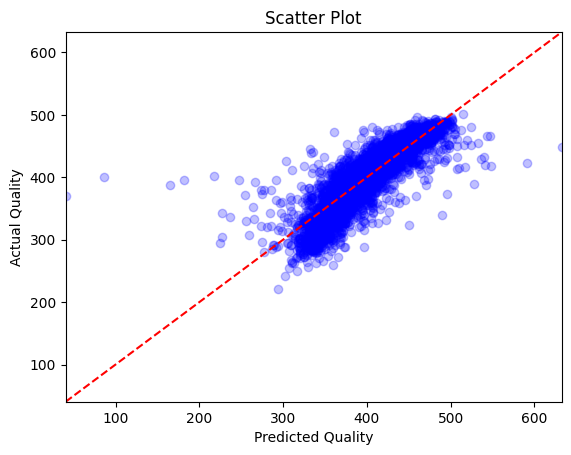

In [ ]:
show_scatter(y_pred_linear, y_test)

XG boost

In [ ]:
xgb_model = XGBRegressor()

In [ ]:
#xgb_cv_absolute =cross_val_score(xgb_model,X_train,y_train,cv=10,scoring=('neg_mean_absolute_error'))


In [ ]:
#xgb_cv_squared =cross_val_score(xgb_model,X_train,y_train,cv=10,scoring=('neg_mean_squared_error'))

In [ ]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
MAE_xgb = mean_absolute_error(y_test, y_pred_xgb)
MSE_xgb = mean_squared_error(y_test,y_pred_xgb)
print('MAE - XGRegressor = ', MAE_xgb)
print('MSE - XGRegressor = ', MSE_xgb)


MAE - XGRegressor =  10.256428492696662
MSE - XGRegressor =  187.07472878045596


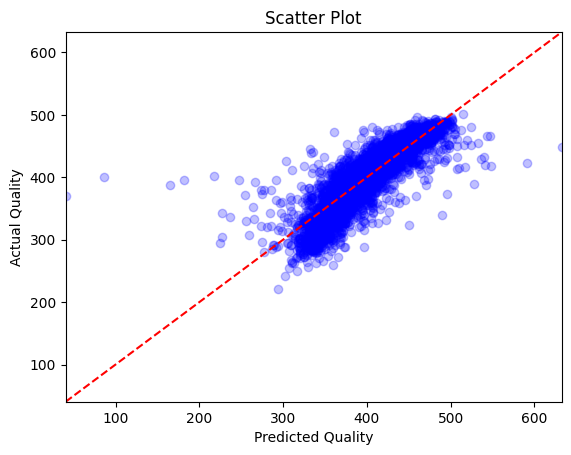

In [ ]:
show_scatter(y_pred_linear, y_test)

Decision Tree

In [ ]:
dt_model = DecisionTreeRegressor(random_state=71)

In [ ]:
#dt_cv_absolute = cross_val_score(dt_model,X_train,y_train,cv=5,scoring=('neg_mean_absolute_error'))

In [ ]:
#dt_cv_squared = cross_val_score(dt_model,X_train,y_train,cv=5,scoring=('neg_mean_squared_error'))

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=71)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
MAE_dt = mean_absolute_error(y_test, y_pred_dt)
MSE_dt = mean_squared_error(y_test,y_pred_dt)
print('MAE - Decision Tree Regressor = ', MAE_dt)
print('MSE - Decision Tree Regressor = ', MSE_dt)

MAE - Decision Tree Regressor =  15.105263157894736
MSE - Decision Tree Regressor =  405.92763157894734


**Ridge**

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred_ridge = ridge.predict(X_test)

In [ ]:
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MAE - Ridge Regression : ", MAE_ridge)
print("MSE - Ridge Regression : ", MSE_ridge)

MAE - Ridge Regression :  15.255050059022878
MSE - Ridge Regression :  497.95534475672895


Lasso

In [ ]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
y_pred_lasso = lasso.predict(X_test)

In [ ]:
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
print("MAE - Ridge Regression : ", MAE_lasso)
print("MSE - Ridge Regression : ", MSE_lasso)

MAE - Ridge Regression :  15.62239753402269
MSE - Ridge Regression :  505.7840419220714


**Artificial Neural Network**

In [ ]:
model = Sequential()
model.add(Dense(17, activation='tanh', input_shape=(17,)))
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(34, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                306       
                                                                 
 dropout (Dropout)           (None, 17)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                432       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 34)                850       
                                                                 
 dropout_2 (Dropout)         (None, 34)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse', 'mae'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/25
342/342 [==============================] - 2s 3ms/step - loss: 108788.3281 - mse: 108788.3281 - mae: 307.5847 - val_loss: 8736.3428 - val_mse: 8736.3428 - val_mae: 74.9025
Epoch 2/25
342/342 [==============================] - 1s 2ms/step - loss: 11996.6104 - mse: 11996.6104 - mae: 88.6390 - val_loss: 1522.4574 - val_mse: 1522.4574 - val_mae: 31.4317
Epoch 3/25
342/342 [==============================] - 1s 2ms/step - loss: 10000.7207 - mse: 10000.7207 - mae: 80.5268 - val_loss: 1360.2932 - val_mse: 1360.2932 - val_mae: 30.7934
Epoch 4/25
342/342 [==============================] - 1s 2ms/step - loss: 9351.7344 - mse: 9351.7344 - mae: 77.7454 - val_loss: 1259.7167 - val_mse: 1259.7167 - val_mae: 29.9254
Epoch 5/25
342/342 [==============================] - 1s 2ms/step - loss: 8683.4043 - mse: 8683.4043 - mae: 74.9225 - val_loss: 1220.1332 - val_mse: 1220.1332 - val_mae: 29.7590
Epoch 6/25
342/342 [==============================] - 1s 2ms/step - loss: 8074.4438 - mse: 8074.4438 

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('MAE- ANN:', score[2])
print('MSE - ANN: ',score[0])

MAE- ANN: 13.899629592895508
MSE - ANN:  328.936767578125


In [ ]:
algos=['Linear', 'XG','Decision Tree', 'Ridge','Lasso','ANN']
mse_values= [MSE_linear, MSE_xgb,MSE_dt, MSE_ridge, MSE_lasso, score[0]]
mae_values= [MAE_linear, MAE_xgb, MAE_dt, MAE_ridge, MAE_lasso, score[2]]

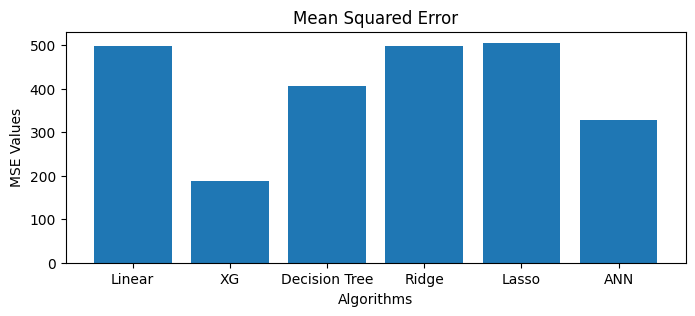

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(algos, mse_values)
plt.xlabel('Algorithms')
plt.ylabel('MSE Values')
plt.title('Mean Squared Error')
plt.show()

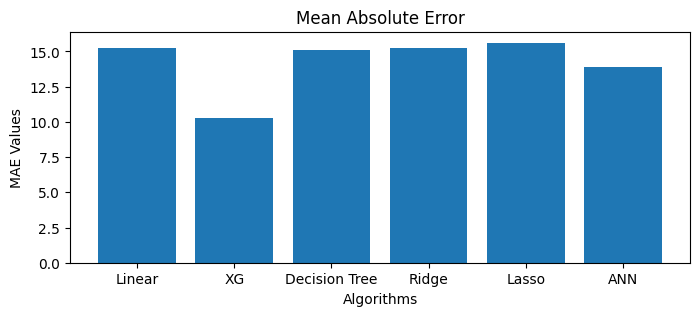

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(algos, mae_values)
plt.xlabel('Algorithms')
plt.ylabel('MAE Values')
plt.title('Mean Absolute Error')
plt.show()

**HYPER PARAMETER TUNNING**

In [ ]:
# Define parameter grids for each model
linear_params = {
    'fit_intercept': [True, False],
}

ridge_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

lasso_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}


# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
tree_model = DecisionTreeRegressor()
xgb_model = XGBRegressor()


# GridSearchCV for each model
linear_grid = GridSearchCV(linear_model, param_grid=linear_params, cv=5)
ridge_grid = GridSearchCV(ridge_model, param_grid=ridge_params, cv=5)
lasso_grid = GridSearchCV(lasso_model, param_grid=lasso_params, cv=5)
tree_grid = GridSearchCV(tree_model, param_grid=tree_params, cv=5)
xgb_grid = GridSearchCV(xgb_model, param_grid=xgb_params, cv=5)

# Fit models
linear_grid.fit(X_train, y_train)
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)
tree_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

# Print best model with best parameters
best_model = {
    "Linear Regression": linear_grid,
    "Ridge Regression": ridge_grid,
    "Lasso Regression": lasso_grid,
    "Decision Tree": tree_grid,
    "XGBoost": xgb_grid,
}

for model_name, model_grid in best_model.items():
    print(model_name)
    print("Best parameters:", model_grid.best_params_)
    print("Best score:", model_grid.best_score_)
    print()


Linear Regression
Best parameters: {'fit_intercept': True}
Best score: 0.7383441122409324

Ridge Regression
Best parameters: {'alpha': 10.0, 'solver': 'saga'}
Best score: 0.7383525241644785

Lasso Regression
Best parameters: {'alpha': 0.1}
Best score: 0.738352665502003

Decision Tree
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.8466262629939706

XGBoost
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score: 0.9165082563577134



In [ ]:
# Best model is XGBoost

In [ ]:
xgb_model_tunned = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=200)

In [ ]:
xgb_model_tunned.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb_tunned = xgb_model_tunned.predict(X_test)

In [ ]:
MAE_xgb_tunned = mean_absolute_error(y_test, y_pred_xgb_tunned)
MSE_xgb_tunned = mean_squared_error(y_test,y_pred_xgb_tunned)
print('MAE - XGRegressor after Hyperparameter tunning = ', MAE_xgb_tunned)
print('MSE - XGRegressor after Hyperparameter tunning = ', MSE_xgb_tunned)

MAE - XGRegressor after Hyperparameter tunning =  9.68637139964522
MSE - XGRegressor after Hyperparameter tunning =  168.51923494579887


In [ ]:
import joblib
joblib.dump(xgb_model, 'xgb_model_tunned.pkl')

['xgb_model_tunned.pkl']

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']